In [1]:
import netCDF4 as nc
import rasterio
import xarray as xr


In [2]:
nc = 'data/model_output_soil_moisture.nc'
nc_file = xr.open_dataset(nc)

In [3]:
ds_filtered = nc_file.sel(time=(nc_file['time'].dt.year >= 2000) & (nc_file['time'].dt.year <= 2021))


In [4]:
import xarray as xr

# Assuming ds_filtered is your xarray.Dataset

# Subtract 300 from the soil moisture data variable
ds_filtered['soil_moisture'] -= 300

# Print the modified dataset
print(ds_filtered)


<xarray.Dataset> Size: 31MB
Dimensions:        (time: 8036, lat: 22, lon: 22)
Coordinates:
  * time           (time) datetime64[ns] 64kB 2000-01-01 ... 2021-12-31
  * lat            (lat) float64 176B 55.25 54.75 54.25 ... 45.75 45.25 44.75
  * lon            (lon) float64 176B 4.75 5.25 5.75 6.25 ... 14.25 14.75 15.25
Data variables:
    soil_moisture  (time, lat, lon) float64 31MB nan nan nan ... 119.9 119.4


In [18]:
ds_filtered

<xarray.Dataset> Size: 31MB
Dimensions:        (time: 8036, lat: 22, lon: 22)
Coordinates:
  * time           (time) datetime64[ns] 64kB 2000-01-01 ... 2021-12-31
  * lat            (lat) float64 176B 55.25 54.75 54.25 ... 45.75 45.25 44.75
  * lon            (lon) float64 176B 4.75 5.25 5.75 6.25 ... 14.25 14.75 15.25
Data variables:
    soil_moisture  (time, lat, lon) float64 31MB nan nan nan ... 119.9 119.4

In [20]:
# Extract the soil moisture values for one grid cell
one_grid_cell_values = ds_filtered['soil_moisture'].isel(lat=0, lon=0)

# Print the values
one_grid_cell_values


<xarray.DataArray 'soil_moisture' (time: 8036)> Size: 64kB
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 64kB 2000-01-01 2000-01-02 ... 2021-12-31
    lat      float64 8B 55.25
    lon      float64 8B 4.75

In [21]:
import xarray as xr

# Assuming ds_filtered is your xarray.Dataset

# Calculate the cumulative accumulation of soil moisture
cumulative_accumulation = ds_filtered['soil_moisture'].copy()  # Make a copy to preserve the original data

# Initialize the cumulative sum at the first time step
cumulative_sum = cumulative_accumulation.isel(time=0)

# Iterate through each time step starting from the second one
for i in range(1, len(ds_filtered['time'])):
    # Calculate the cumulative sum by adding the current day's value to the previous cumulative sum
    cumulative_sum += cumulative_accumulation.isel(time=i)

    # Update the cumulative accumulation for the current time step
    cumulative_accumulation[i] = cumulative_sum

# Print the dataset with cumulative accumulation
print(cumulative_accumulation)


<xarray.DataArray 'soil_moisture' (time: 8036, lat: 22, lon: 22)> Size: 31MB
array([[[            nan,             nan,             nan, ...,
          2.28594430e+05,  1.43148047e+05,  1.53459598e+05],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,  2.52023632e+05,  3.55680619e+05],
        ...,
        [ 4.91075626e+05,  5.70927728e+05,  6.66178371e+05, ...,
          6.19849405e+05,  5.99237134e+05,  5.50745288e+05],
        [ 4.56427323e+05,  4.94988614e+05,  6.07178750e+05, ...,
          4.77727362e+05,  5.38739337e+05,  5.53223068e+05],
        [ 3.26441761e+05,  3.23804434e+05,  4.23293098e+05, ...,
          1.31216616e+05,  3.16196968e+05,  4.55037693e+05]],

       [[            nan,             nan,             nan, ...,
         -2.22000000e+02, -2.22000000e+02, -2.22000000e+02],
        [            nan, 

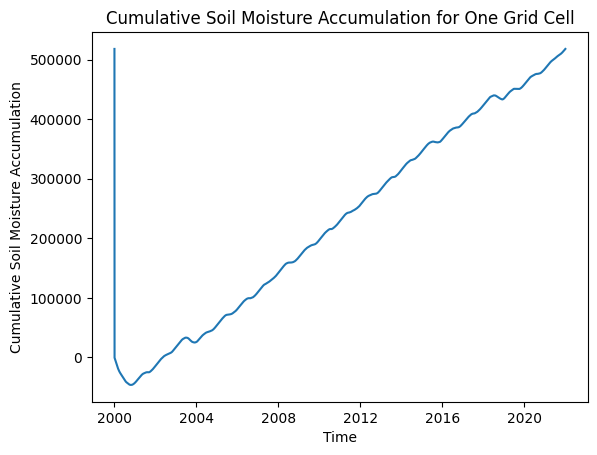

In [17]:
import matplotlib.pyplot as plt

# Assuming cumulative_accumulation is the xarray.DataArray with cumulative accumulation

# Select one grid cell
one_grid_cell = cumulative_accumulation.isel(lat=11, lon=11)  # Selecting the first grid cell

# Plot the cumulative accumulation over time
one_grid_cell.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative Soil Moisture Accumulation')
plt.title('Cumulative Soil Moisture Accumulation for One Grid Cell')
plt.show()
